## Classification d'image et convolutions

On veut faire un modèle de machine learning pour classer des chiffres afin de pouvoir faire de la lecture de compteur electrique automatiquement. 

Pour cela on va faire un premier modèle capable de classer des images contenant un seul chiffre.

## Chargement des données

Keras met à disposition le dataset mnist. 

Importer la fonction load_data du sous module tensorflow.keras.datasets.mnist 

In [21]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train),(x_test, y_test) = load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [2]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [3]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000,)


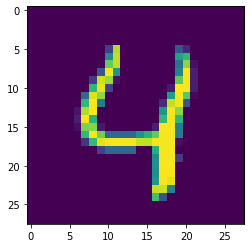

In [34]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

## le modèle 

importer la class Sequential de keras

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [22]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

model.fit(x_train,y_train,epochs=3, validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3701 - accuracy: 0.9015 - val_loss: 0.1526 - val_accuracy: 0.9524
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1291 - accuracy: 0.9618 - val_loss: 0.1325 - val_accuracy: 0.9607
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0936 - accuracy: 0.9703 - val_loss: 0.1408 - val_accuracy: 0.9595


In [19]:
print(np.size(tuple(x_test[0])))

NameError: name 'np' is not defined

In [31]:
model.predict((x_test[3].reshape(1,28,28,1)))

array([[9.99912024e-01, 8.73475597e-12, 3.59316073e-06, 5.45789953e-06,
        1.38422164e-11, 5.41516738e-06, 3.89277557e-05, 2.94380643e-05,
        4.72681094e-08, 5.09719939e-06]], dtype=float32)

In [33]:
import numpy as np

print(np.argmax(model.predict((x_test[4].reshape(1,28,28,1)))))

4
